In [1]:
using Revise
includet("../scripts/ned_ca_s1_stats.jl")
using GLMakie
using WGLMakie
using CairoMakie
using JLD2

# Build/load the df

In [2]:
# df = make_s1_stats_df(3:10)
df = load_object("../data/ned_ca/s1_stats15.jld2");
# save_object(datadir("ned_ca", "s1_stats_temp.jld2"), df)

In [3]:
df.eqp_code = find_eq_parent_ucode.(df.code);

In [4]:
describe(df)

23×7 DataFrame
 Row │ variable   mean          min          median     max      nmissing  elt ⋯
     │ Symbol     Float64       Real         Float64    Real     Int64     Dat ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ code         75.3636      0            55.0        232           0  Int ⋯
   2 │ N             9.0         3             9.0         15           0  Int
   3 │ numstates  5040.62        8           512.0      32768           0  Int
   4 │ phi           0.348848    3.05176e-5    0.09375      1.0         0  Flo
   5 │ Nac         123.954       1             2.0      32768           0  Int ⋯
   6 │ Nsingle     112.96        0             1.0      32768           0  Int
   7 │ Neq          10.7308      0             0.0       3246           0  Int
   8 │ Nneq          0.263112    0             0.0          7           0  Int
   9 │ Neqcyc        0.575175    0             0.0        180           0  Int ⋯
  10 │ Nneqcyc       0.0428322   0             0.0          1           0  Int
  11 │ Mac        1081.5         1             1.0      32768           0  Int
  ⋮  │     ⋮           ⋮             ⋮           ⋮         ⋮        ⋮          ⋱
  14 │ Mneq        782.374       0             0.0      32768           0  Int
  15 │ Meqcyc        0.466783    0             0.0         30           0  Int ⋯
  16 │ Mneqcyc       0.770979    0             0.0         30           0  Int
  17 │ Kac        1452.54        1            11.0      32768           0  Int
  18 │ Ksingle     112.96        0             1.0      32768           0  Int
  19 │ Keq         488.221       0             0.0      32768           0  Int ⋯
  20 │ Kneq        851.36        0             0.0      32768           0  Int
  21 │ Keqcyc        2.64161     0             0.0        720           0  Int
  22 │ Kneqcyc       0.770979    0             0.0         30           0  Int
  23 │ eqp_code     67.8068     51            54.0        204           0  Int ⋯
                                                     1 column and 2 rows omitted

# Exploratory plots

In [5]:
# make a selection of the df that is then plotted below
# sdf =  df[2 .<= ca_numenzymes.(df.code) .<= 4,:];
sdf =  df[ca_numenzymes.(df.code) .== 3,:];
# sdf = df;

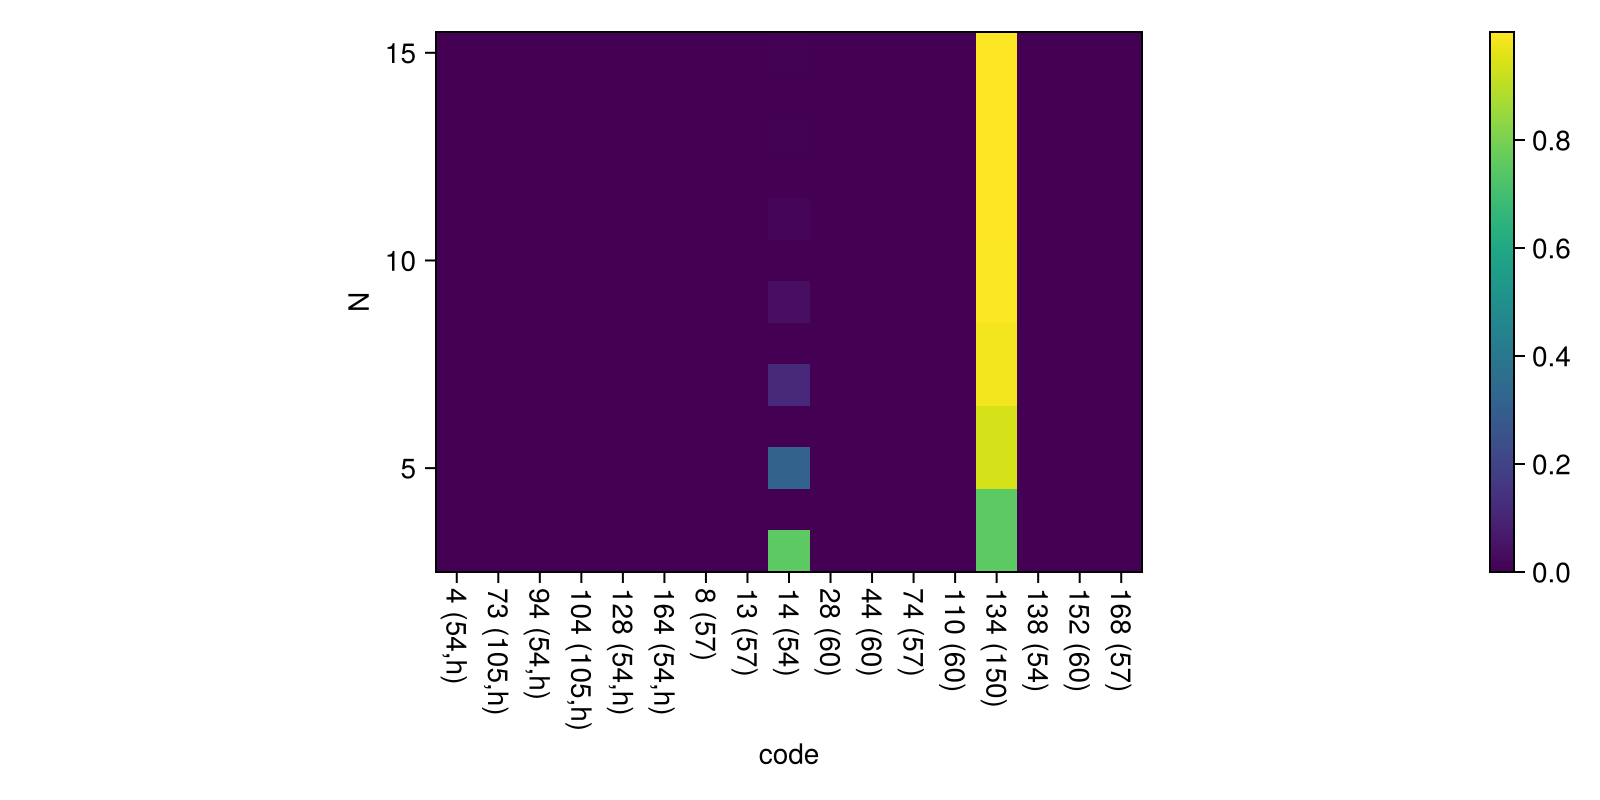

In [6]:
codes = unique(sdf.code)
code_i = map(c->findfirst(x->x==c, codes), sdf.code)

fig = Figure(size=(800, 400))
ax = Axis(fig[1,1], aspect=DataAspect())

# plot = scatter!(ax, code_i, sdf.N; color=sdf.phi, marker=:rect, markersize=20)
plot = heatmap!(ax, code_i, sdf.N, sdf.Kneq ./ sdf.numstates)
Colorbar(fig[1,2], plot)

ax.ylabel = "N"
ax.xlabel = "code"
ax.xticks = (1:length(codes), full_code_label.(codes; short=true))
ax.xticklabelrotation = -pi/2

fig

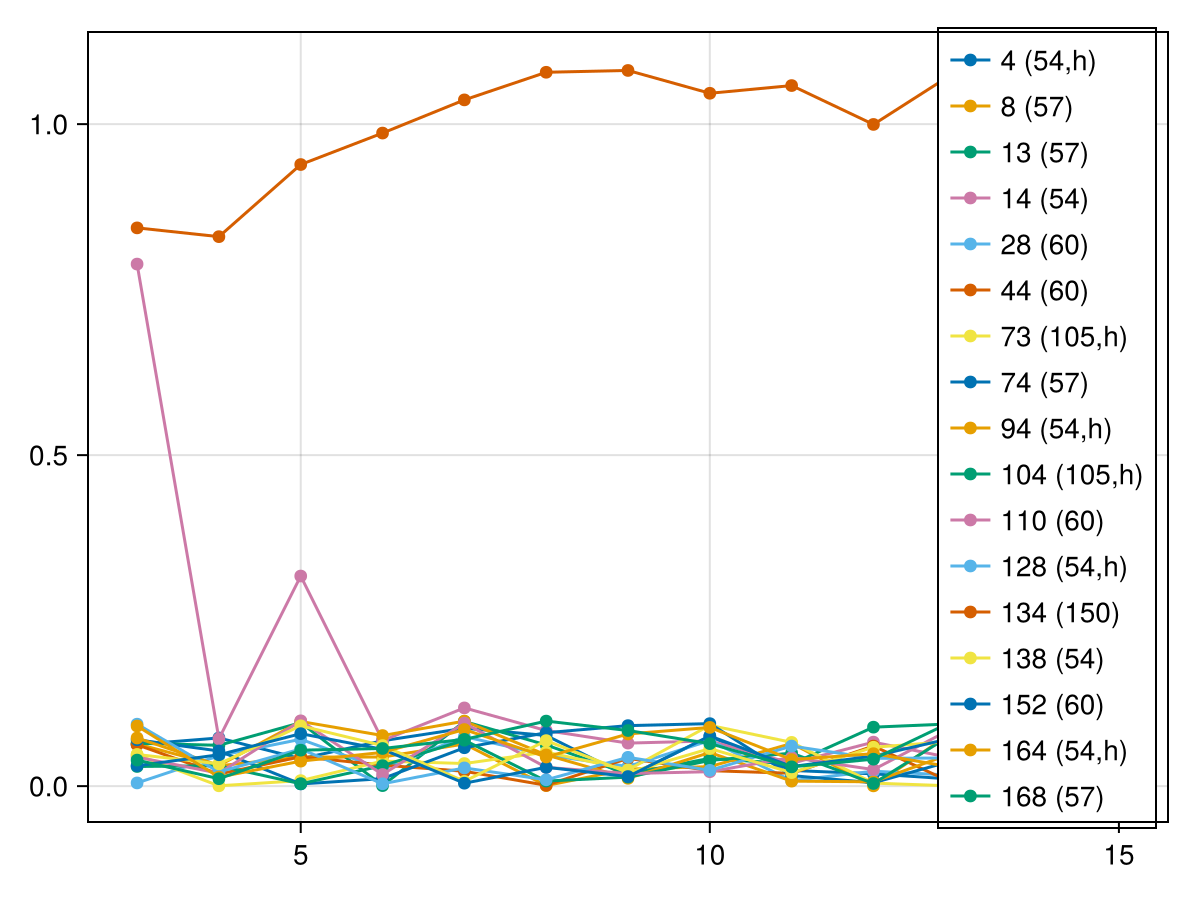

In [7]:
fig = Figure()
ax = Axis(fig[1,1];
    # yscale=Makie.pseudolog10
)
for gdf in groupby(sdf, :code)
    code = gdf.code[1]
    scatterlines!(ax, gdf.N, (gdf.Kneq ./ gdf.numstates) .+ 0.1.*rand(length(gdf.Kneq)); label=full_code_label(code; short=true))
    # scatterlines!(ax, gdf.N, gdf.Nsingle ./ gdf.Nac; label=full_code_label(code; short=true))
end
axislegend(ax; position=:rc)
fig

In [8]:
display(GLMakie.Screen(), fap)

LoadError: UndefVarError: `fap` not defined

K01 = [0 1; 0 0]
K10 = [0 0; 1 1]


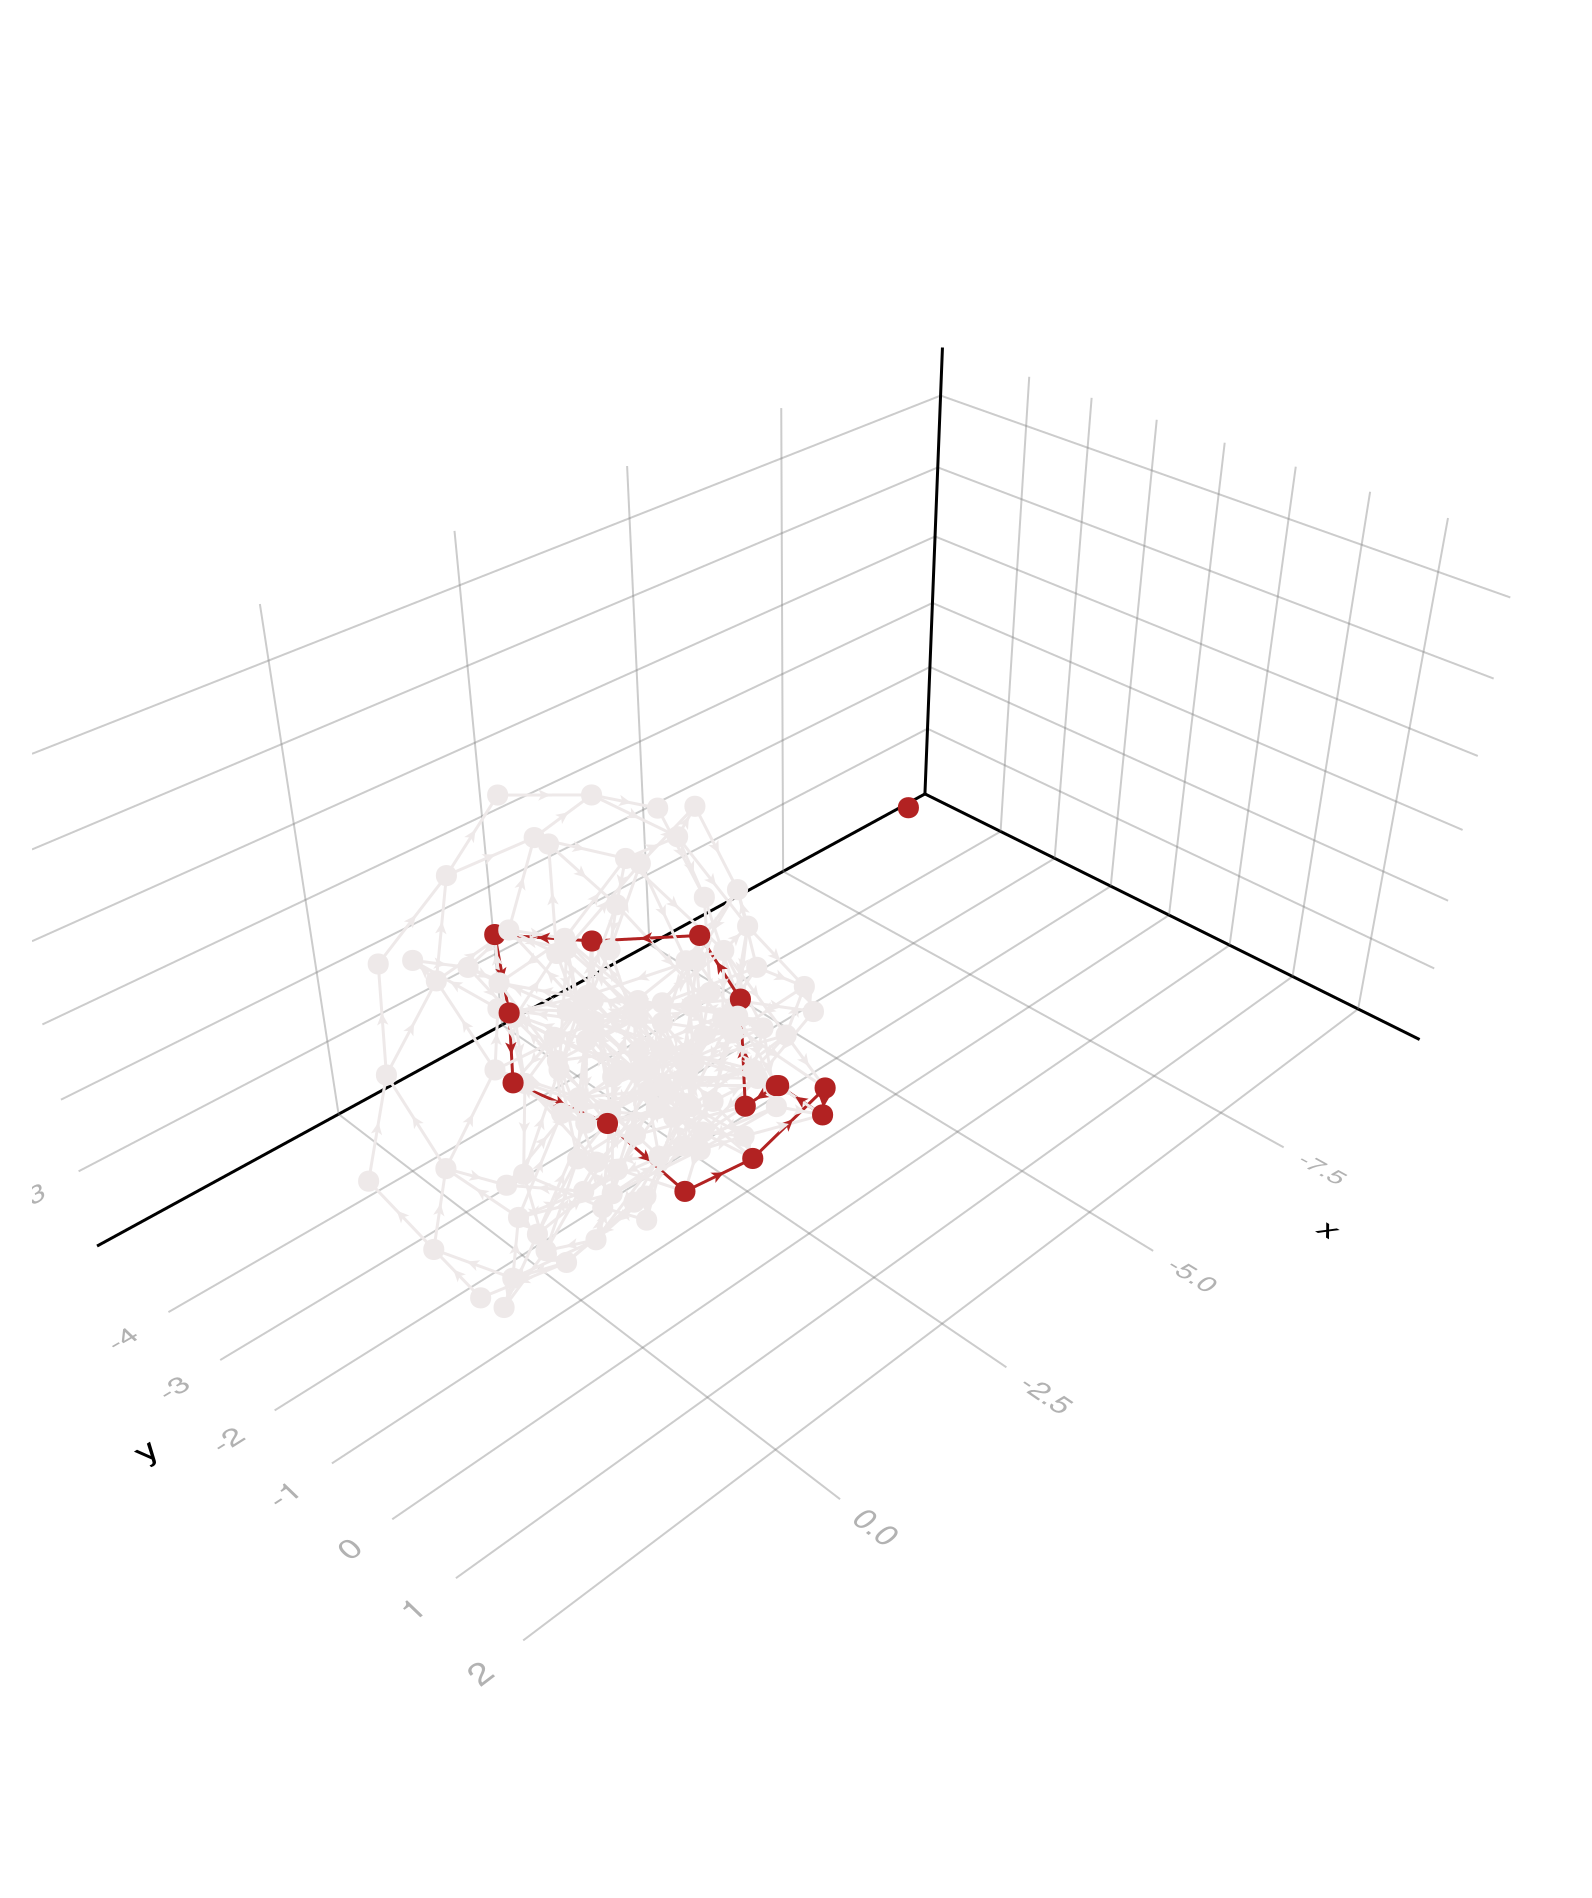

In [9]:
ned = make_ca_ned(7, 14)
faa = plotgm(ned;
    layout=Spring(dim=3),
    get_ac_coloring_kwargs(ned)...
)
display(GLMakie.Screen(), faa)
faa

# Everything plot

In [10]:
eqp_order = [204, 108, 156, 105, 150, 60, 54, 57, 51]
function code_eqp_sortby(c)
    eqp = find_eq_parent_ucode(c)
    findfirst(x->x==eqp, eqp_order)
end
function code_sortby2(c)
    eqp = find_eq_parent_ucode(c)
    eqp_i = findfirst(x->x==eqp, eqp_order)

    ne = ca_numenzymes(c)

    ne * 100 + eqp_i
    (ne, eqp_i)
end

code_sortby2 (generic function with 1 method)

In [11]:
# testing!
codes = sort(codes; by=code_sortby2)
code_i = map(c->findfirst(x->x==c, codes), df.code);

In [12]:
# sort by eq parents
codes = sort(codes; by=code_eqp_sortby)
code_i = map(c->findfirst(x->x==c, codes), df.code);

In [13]:
# pretty much random sorting
codes = unique(df.code)
code_i = map(c->findfirst(x->x==c, codes), df.code);

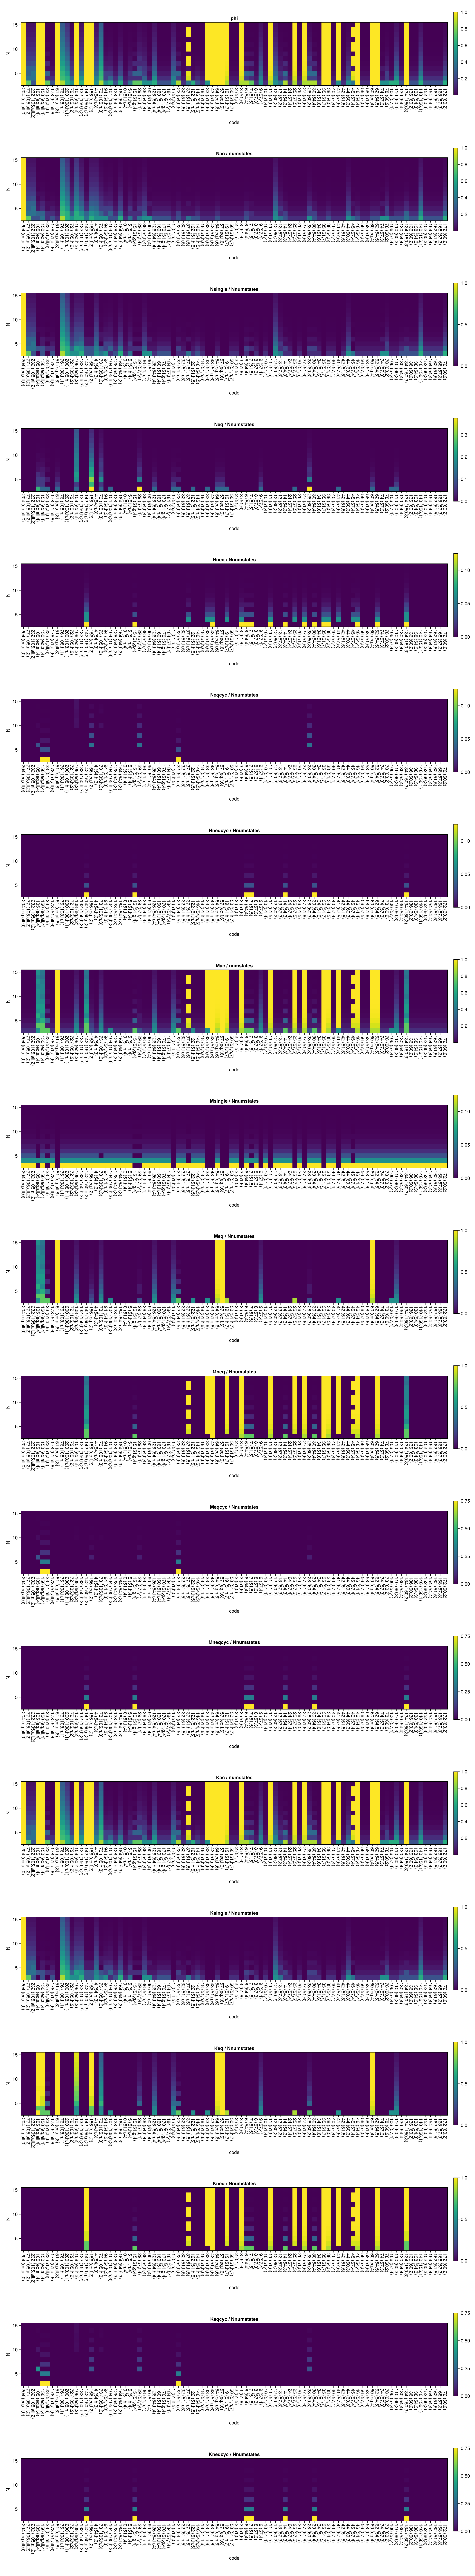

In [14]:
quants = [
    ("phi", df.phi),
    
    ("Nac / numstates", df.Nac ./ df.numstates),
    ("Nsingle / Nnumstates", df.Nsingle ./ df.numstates),
    ("Neq / Nnumstates", df.Neq ./ df.numstates),
    ("Nneq / Nnumstates", df.Nneq ./ df.numstates),
    ("Neqcyc / Nnumstates", df.Neqcyc ./ df.numstates),
    ("Nneqcyc / Nnumstates", df.Nneqcyc ./ df.numstates),
    
    ("Mac / numstates", df.Mac ./ df.numstates),
    ("Msingle / Nnumstates", df.Msingle ./ df.numstates),
    ("Meq / Nnumstates", df.Meq ./ df.numstates),
    ("Mneq / Nnumstates", df.Mneq ./ df.numstates),
    ("Meqcyc / Nnumstates", df.Meqcyc ./ df.numstates),
    ("Mneqcyc / Nnumstates", df.Mneqcyc ./ df.numstates),
    
    ("Kac / numstates", df.Kac ./ df.numstates),
    ("Ksingle / Nnumstates", df.Ksingle ./ df.numstates),
    ("Keq / Nnumstates", df.Keq ./ df.numstates),
    ("Kneq / Nnumstates", df.Kneq ./ df.numstates),
    ("Keqcyc / Nnumstates", df.Keqcyc ./ df.numstates),
    ("Kneqcyc / Nnumstates", df.Kneqcyc ./ df.numstates),
]

fig = Figure(size=(1400, 400*length(quants)))

for (i, (qname, q)) in enumerate(quants)
    ax = Axis(fig[i,1], aspect=DataAspect())
    p = heatmap!(ax, code_i, df.N, q;
        # colorscale=Makie.pseudolog10
    )
    Colorbar(fig[i,2], p)

    ax.title = qname
    
    ax.ylabel = "N"
    ax.xlabel = "code"
    ax.xticks = (1:length(codes), full_code_label.(codes; short=true, numenzymes=true))
    ax.xticklabelrotation = -pi/2
end

# save(datadir("ned_ca", "s1_bigplot_plog.pdf"), fig)
save(datadir("ned_ca", "s1_bigplot.pdf"), fig)
fig

# Looking by equilibrium parent

In [15]:
xx = unique(df.eqp_code)
yy = ca_numenzymes.(xx)
sp = sortperm(yy)
for i in sp
    println(@sprintf "%-20s -- numenzymes is %d" full_code_label(xx[i]) yy[i])
end

Rule 204 (eq,all)    -- numenzymes is 0
Rule 108 (eq,h)      -- numenzymes is 2
Rule 156 (eq,f)      -- numenzymes is 2
Rule 105 (eq,all)    -- numenzymes is 4
Rule 150 (eq,all)    -- numenzymes is 4
Rule 60 (eq)         -- numenzymes is 4
Rule 54 (eq,h)       -- numenzymes is 6
Rule 57 (eq,f)       -- numenzymes is 6
Rule 51 (eq,all)     -- numenzymes is 8


In [16]:
# make a selection of the df that is then plotted below
sdf =  df[df.eqp_code .== 57,:];
# sdf = df;
length(unique(sdf.code))

15

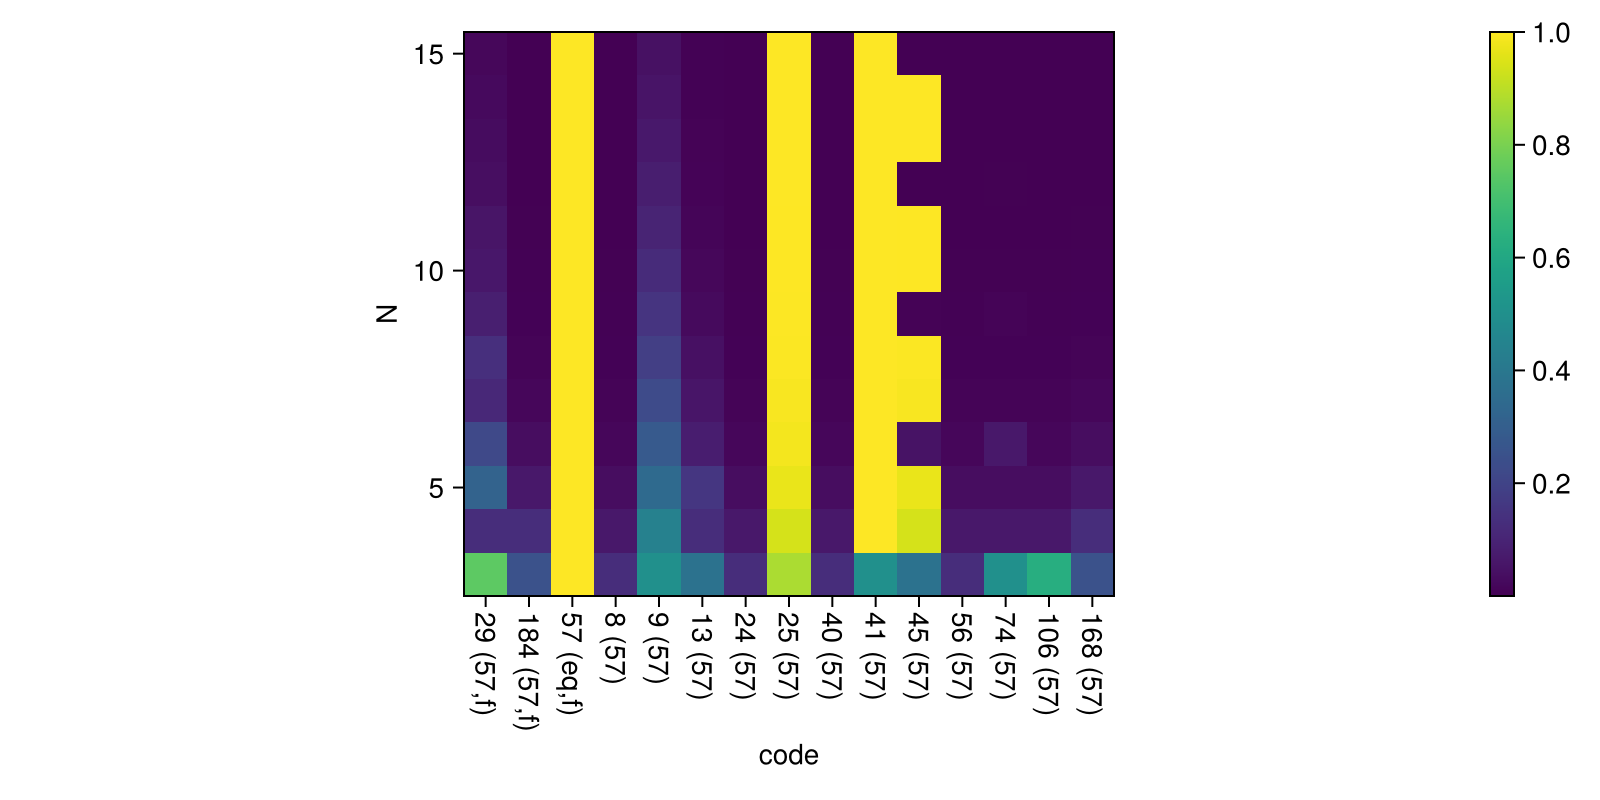

In [17]:
codes = unique(sdf.code)
code_i = map(c->findfirst(x->x==c, codes), sdf.code)

fig = Figure(size=(800, 400))
ax = Axis(fig[1,1], aspect=DataAspect())

# plot = scatter!(ax, code_i, sdf.N; color=sdf.phi, marker=:rect, markersize=20)
plot = heatmap!(ax, code_i, sdf.N, sdf.phi)
Colorbar(fig[1,2], plot)

ax.ylabel = "N"
ax.xlabel = "code"
ax.xticks = (1:length(codes), full_code_label.(codes; short=true))
ax.xticklabelrotation = -pi/2

fig

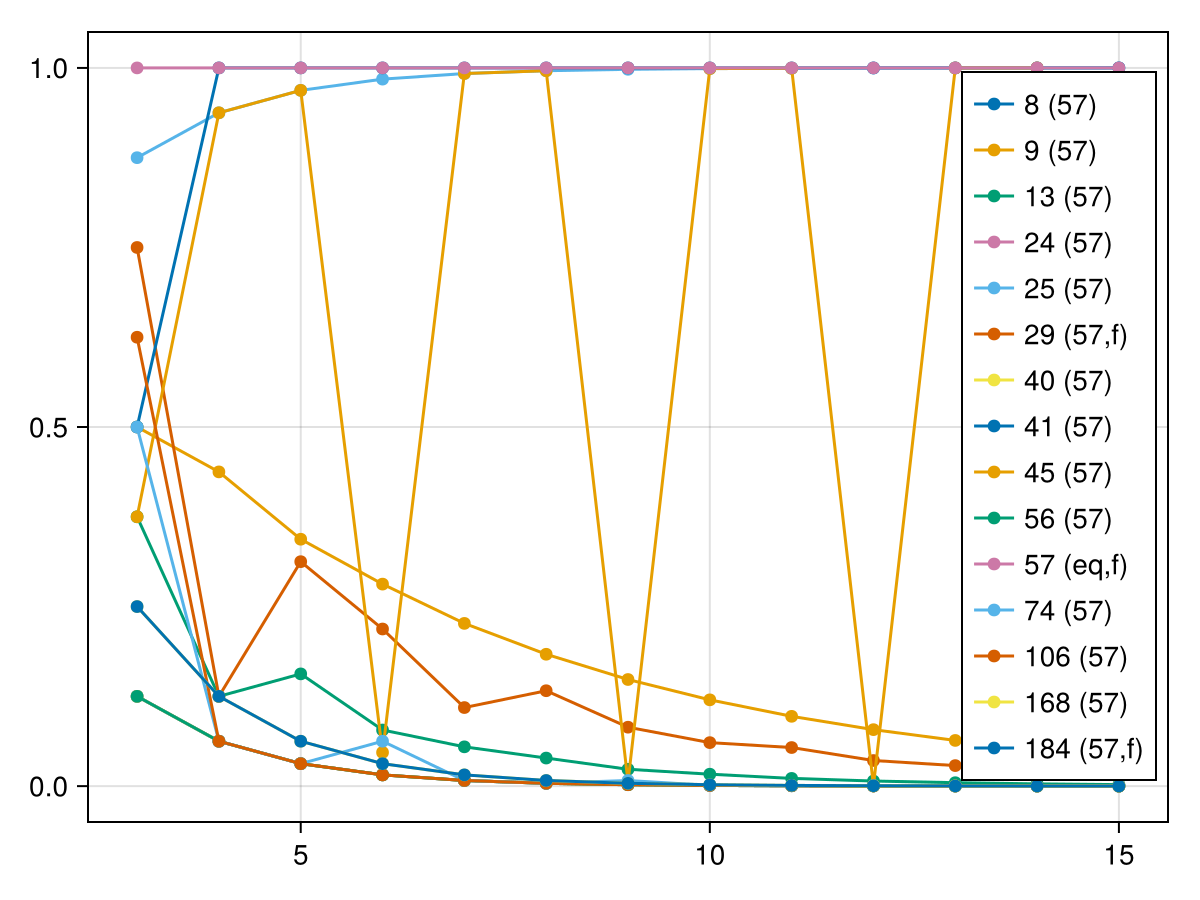

In [18]:
fig = Figure()
ax = Axis(fig[1,1];
    # yscale=Makie.pseudolog10
)
for gdf in groupby(sdf, :code)
    code = gdf.code[1]
    scatterlines!(ax, gdf.N, gdf.phi; label=full_code_label(code; short=true))
    # scatterlines!(ax, gdf.N, gdf.Nsingle ./ gdf.Nac; label=full_code_label(code; short=true))
end
axislegend(ax; position=:rc)
fig

# Bits and bobs

In [19]:
# Finding cases of phi == 1
xx = df[isapprox.(df.phi, 1.) .&& .!ca_iseq.(df.code) .&& df.N .> 3,:];
# unique(xx.code)
find_eq_parent_ucode.(unique(xx.code))

9-element Vector{Int64}:
 150
  51
  51
  51
  54
  57
  54
  54
 150